In [61]:
import pandas as pd
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns

In [8]:
df = pd.read_csv('dataset.csv')

In [45]:
df


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [ ]:
df.isnull().sum().sort_values(ascending=False)

Total number of columns which consist of missing values 19


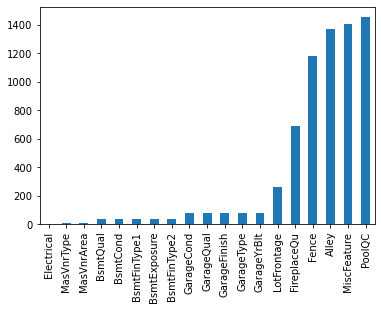

In [53]:
missing = df.isnull().sum()
missing = missing[missing > 0]
print("Total number of columns which consist of missing values",missing.count())
missing.sort_values(inplace=True)
missing.plot.bar()

In [ ]:
#we will remove the columns who have highes number of missing values

In [52]:
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
percent
missing_data = pd.concat([missing, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
Electrical,1.0,0.000685
MasVnrType,8.0,0.005479
MasVnrArea,8.0,0.005479
BsmtQual,37.0,0.025342
BsmtCond,37.0,0.025342
BsmtFinType1,37.0,0.025342
BsmtExposure,38.0,0.026027
BsmtFinType2,38.0,0.026027
GarageCond,81.0,0.055479
GarageQual,81.0,0.055479


Skewness: 1.882876
Kurtosis: 6.536282


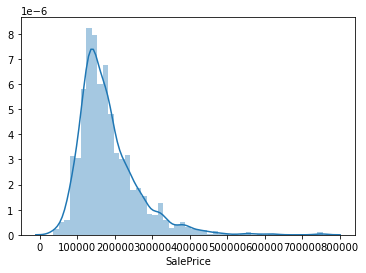

In [57]:
#skewness and kurtosis
print("Skewness: %f" % df['SalePrice'].skew())
sns.distplot(df['SalePrice']);
print("Kurtosis: %f" % df['SalePrice'].kurt())

In [ ]:
#Drop GarageArea, GarageYrBlt, 1stFlrSF, TotRmsAbvGrd


In [42]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

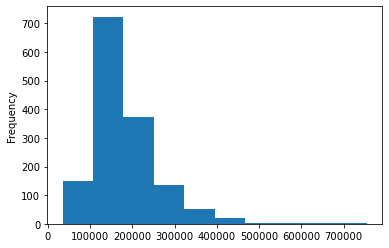

In [43]:
df['SalePrice'].plot(kind="hist")


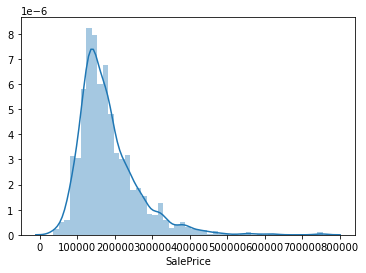